# Henry's constant calculations

In this notebook we'll calculate the characteristic Henry's constant at zero
loading. Unlike fitting the entire isotherm with a Henry model, these methods
will attempt to fit a straight line only on the initial part of the isotherm.
First, make sure the data is imported.

In [1]:
# import isotherms
%run import.ipynb

# import the characterisation module
import pygaps.characterisation as pgc

Selected 5 isotherms with nitrogen at 77K
Selected 2 room temperature calorimetry isotherms
Selected 2 isotherms for IAST calculation
Selected 3 isotherms for isosteric enthalpy calculation


### Slope method

The slope method of calculating Henry's fits a linear henry model to the
isotherm points. If the model does not fit, it goes to progressively lower
pressures until it finds a good fit. For data that is very non-linear, this fit
might be between p=0 and the first isotherm point.

Calculated K = 5.549e+04
Starting points: 42
Selected points: 2
Final adjusted RMSE: 5.32e-13
Calculated K = 6.977e+05
Starting points: 91
Selected points: 7
Final adjusted RMSE: 0.0061
55485.962663510676 697654.2592115065


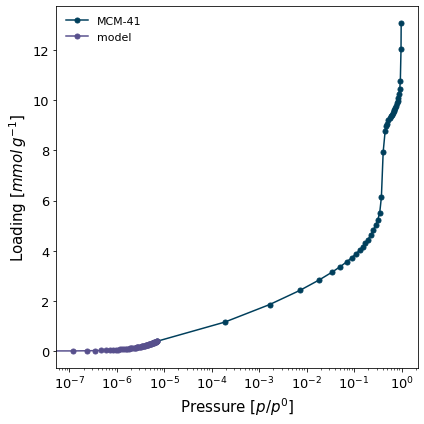

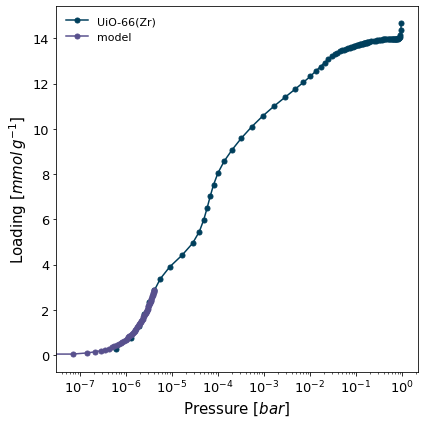

In [2]:
# Slope method
isotherm = next(i for i in isotherms_n2_77k if i.material == 'MCM-41')
h1 = pgc.initial_henry_slope(isotherm, max_adjrms=0.01, logx=True, verbose=True)

isotherm = next(i for i in isotherms_n2_77k if i.material == 'UiO-66(Zr)')
h2 = pgc.initial_henry_slope(isotherm, max_adjrms=0.01, logx=True, verbose=True)

print(h1, h2)

### Virial method

The virial method uses a virial model to fit the data and then obtain the Henry
constant from the value of the virial function at n=0. If the data is fitted
well by a virial model, the resulting Henry constant will be very accurate.

Attempting to model using Virial
Model Virial success, RMSE is 0.2174
Attempting to model using Virial
Model Virial success, RMSE is 0.494
194297.38100718585 1365637.221525526


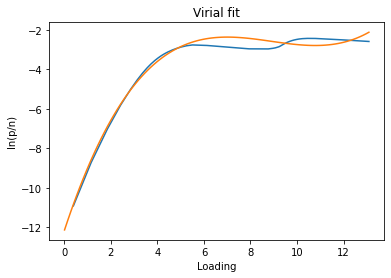

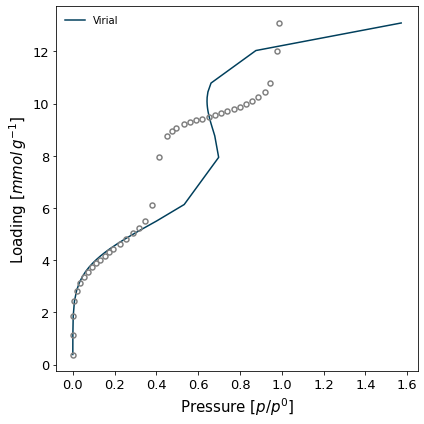

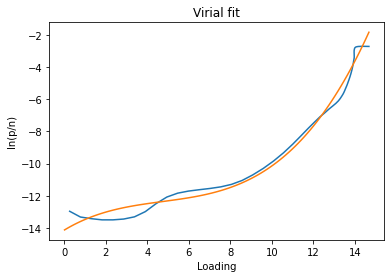

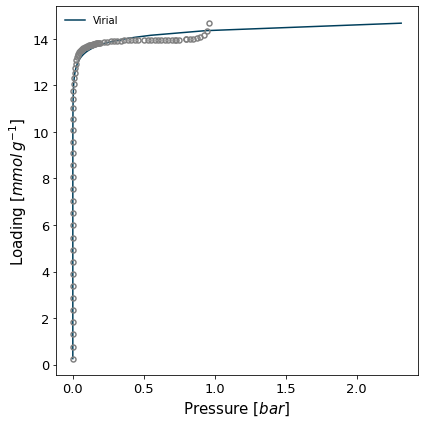

In [3]:
# Virial method
isotherm = next(i for i in isotherms_n2_77k if i.material == 'MCM-41')
h1 = pgc.initial_henry_virial(isotherm, verbose=True)

isotherm = next(i for i in isotherms_n2_77k if i.material == 'UiO-66(Zr)')
h2 = pgc.initial_henry_virial(isotherm, verbose=True)

print(h1, h2)

More information about the functions and their use can be found in the [manual](../manual/characterisation.rst).